In [ ]:
!pip install tensorflow-gpu


     |████████████████████████████████| 497.5 MB 20 kB/s 
     |████████████████████████████████| 462 kB 34.3 MB/s 


In [2]:
import tensorflow as tf

In [ ]:
print(tf.__version__)

2.8.0


In [ ]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [9]:
# Importing the dataset
dataset = pd.read_csv('Churn_Modelling.csv')
X = dataset.iloc[:, 3:13]
y = dataset.iloc[:, 13]

In [10]:
#Create dummy variables
geography=pd.get_dummies(X["Geography"],drop_first=True)
gender=pd.get_dummies(X['Gender'],drop_first=True)

In [11]:
## Concatenate the Data Frames

X=pd.concat([X,geography,gender],axis=1)

## Drop Unnecessary columns
X=X.drop(['Geography','Gender'],axis=1)

# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)


In [12]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)


In [13]:
# Part 2 - Now let's make the ANN!

In [14]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LeakyReLU,PReLU,ELU
from tensorflow.keras.layers import Dropout


In [15]:
# Initialising the ANN
classifier = Sequential()

In [16]:
# Adding the input layer and the first hidden layer
classifier.add(Dense(units=11,activation='relu'))

In [17]:
# Adding the input layer and the first hidden layer
classifier.add(Dense(units=6,activation='relu'))

In [18]:
# Adding the input layer and the first hidden layer
classifier.add(Dense(units=1,activation='relu'))

In [19]:
classifier.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [28]:
model_history=classifier.fit(X_train,y_train,validation_split=0.30,batch_size=10,epochs=50)

Epoch 1/50
560/560 [==============================] - 2s 4ms/step - loss: 0.3561 - accuracy: 0.8582 - val_loss: 0.4683 - val_accuracy: 0.8475
Epoch 2/50
560/560 [==============================] - 2s 4ms/step - loss: 0.3499 - accuracy: 0.8614 - val_loss: 0.4207 - val_accuracy: 0.8500
Epoch 3/50
560/560 [==============================] - 2s 3ms/step - loss: 0.3448 - accuracy: 0.8637 - val_loss: 0.4388 - val_accuracy: 0.8487
Epoch 4/50
560/560 [==============================] - 2s 3ms/step - loss: 0.3523 - accuracy: 0.8600 - val_loss: 0.4487 - val_accuracy: 0.8487
Epoch 5/50
560/560 [==============================] - 2s 4ms/step - loss: 0.3531 - accuracy: 0.8607 - val_loss: 0.4185 - val_accuracy: 0.8512
Epoch 6/50
560/560 [==============================] - 2s 3ms/step - loss: 0.3497 - accuracy: 0.8589 - val_loss: 0.4205 - val_accuracy: 0.8537
Epoch 7/50
560/560 [==============================] - 2s 4ms/step - loss: 0.3489 - accuracy: 0.8620 - val_loss: 0.4380 - val_accuracy: 0.8479
Epoch 

In [29]:
# list all data in history

print(model_history.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


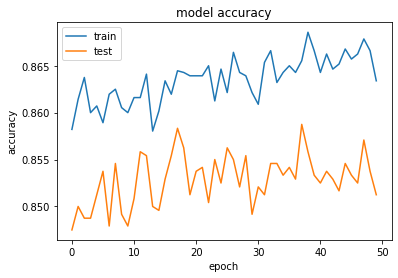

In [35]:

# summarize history for accuracy
plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

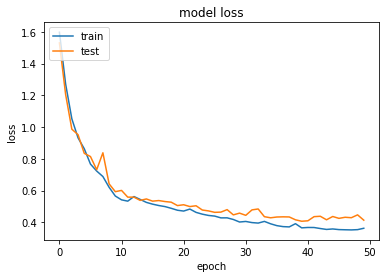

In [23]:
# summarize history for loss
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [31]:
# Part 3 - Making the predictions and evaluating the model

# Predicting the Test set results
y_pred = classifier.predict(X_test)
y_pred = (y_pred > 0.5)

In [38]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix, plot_confusion_matrix,classification_report
cm = confusion_matrix(y_test, y_pred)
cm

array([[1528,   67],
       [ 211,  194]])

In [39]:
# Calculate the Accuracy
from sklearn.metrics import accuracy_score
score=accuracy_score(y_pred,y_test)

In [40]:
score

0.861

In [41]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.88      0.96      0.92      1595
           1       0.74      0.48      0.58       405

    accuracy                           0.86      2000
   macro avg       0.81      0.72      0.75      2000
weighted avg       0.85      0.86      0.85      2000

